In [1]:
# Libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Settings 

year = 2021

In [3]:
# Datas

gdp_in_year = "GDP " + str(year)
gdp_per_area = pd.read_excel("GDP And Population.xlsx")
gdp_per_region = pd.read_excel("GDP For Region.xlsx")

In [4]:
# Data Cleaning

gdp_per_area = gdp_per_area.astype('string')
gdp_per_area['GDP 2019'] = list(gdp_per_area['GDP 2019'].astype(float))
gdp_per_area['GDP 2020'] = list(gdp_per_area['GDP 2020'].astype(float))
gdp_per_area['GDP 2021'] = list(gdp_per_area['GDP 2021'].astype(float))
gdp_per_area['POPULATION'] = list(gdp_per_area['POPULATION'].astype(int))
gdp_per_region = gdp_per_region.astype('string')
gdp_per_region['GDP 2019'] = list(gdp_per_region['GDP 2019'].astype(float))
gdp_per_region['GDP 2020'] = list(gdp_per_region['GDP 2020'].astype(float))
gdp_per_region['GDP 2021'] = list(gdp_per_region['GDP 2021'].astype(float))
gdp_per_region['POPULATION'] = list(gdp_per_region['POPULATION'].astype(int))

# Arrays

GDP_per_capita = []
north_italy_regions = []
north_italy_gdp = []
north_italy_pc_gdp = []
north_italy_population = []
central_italy_regions = []
central_italy_gdp = []
central_italy_pc_gdp = []
central_italy_population= []
south_italy_regions = []
south_italy_gdp = []
south_italy_pc_gdp = []
south_italy_population = []

for i in range(len(gdp_per_region)):
    GDP_per_capita.append(round(gdp_per_region[gdp_in_year][i] * 1000000 / gdp_per_region['POPULATION'][i],2))

gdp_per_region.insert(5,'GDP PER CAPITA',GDP_per_capita)


In [5]:
# DataFrame Split

south_regions = ["Calabria", "Sicilia", "Campania", "Puglia", "Abbruzzo", "Molise", "Basilicata", "Sicilia"]
north_regions = ['Lombardia', 'Piemonte', 'Liguria', "Valle d'Aosta", "Trentino Alto Adige", "Veneto", "Friuli Venezia Giulia", "Emilia Romagna"]
centre_regions = ['Toscana', 'Umbria', 'Marche', 'Lazio']

for i in range(len(gdp_per_region)):

    if gdp_per_region['Region'][i] in north_regions:

        north_italy_regions.append(gdp_per_region['Region'][i])
        north_italy_gdp.append(gdp_per_region[gdp_in_year][i])
        north_italy_pc_gdp.append(gdp_per_region["GDP PER CAPITA"][i])
        north_italy_population.append(gdp_per_region["POPULATION"][i])

    elif gdp_per_region['Region'][i] in centre_regions:
        central_italy_regions.append(gdp_per_region['Region'][i])
        central_italy_gdp.append(gdp_per_region[gdp_in_year][i])
        central_italy_pc_gdp.append(gdp_per_region["GDP PER CAPITA"][i])
        central_italy_population.append(gdp_per_region["POPULATION"][i])

    elif gdp_per_region['Region'][i] in south_regions:
        south_italy_regions.append(gdp_per_region['Region'][i])
        south_italy_gdp.append(gdp_per_region[gdp_in_year][i])
        south_italy_pc_gdp.append(gdp_per_region["GDP PER CAPITA"][i])
        south_italy_population.append(gdp_per_region["POPULATION"][i])

list_tuples = list(zip(north_italy_regions,north_italy_gdp,north_italy_pc_gdp, north_italy_population))
df_nord = pd.DataFrame(list_tuples, columns=['REGION', gdp_in_year, 'GDP PER CAPITA', 'POPULATION'])
list_tuples = list(zip(central_italy_regions,central_italy_gdp,central_italy_pc_gdp,central_italy_population))
df_centro = pd.DataFrame(list_tuples, columns=['REGION', gdp_in_year, 'GDP PER CAPITA', 'POPULATION'])
list_tuples = list(zip(south_italy_regions,south_italy_gdp,south_italy_pc_gdp,south_italy_population))
df_sud = pd.DataFrame(list_tuples, columns=['REGION', gdp_in_year, 'GDP PER CAPITA', 'POPULATION'])

C:\Users\marko\AppData\Local\Temp\ipykernel_33940\1212908261.py:17: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = plt.colorbar()


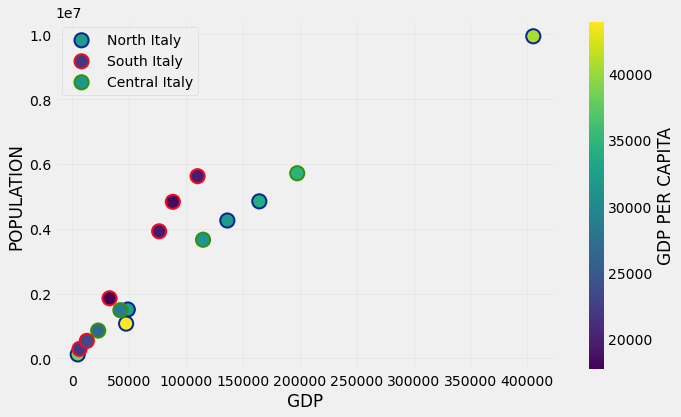

In [6]:
# Plot 1

plt.style.use('fivethirtyeight')

color_bar_index = np.concatenate([df_sud['GDP PER CAPITA'], df_centro['GDP PER CAPITA'], df_nord['GDP PER CAPITA']], axis=0)
min = color_bar_index.min()
max = color_bar_index.max()
plt.figure(figsize=(10,6))

plt.scatter(df_nord[gdp_in_year],df_nord['POPULATION'], edgecolor='#072792', s=200,linewidth=2,label='North Italy',c=df_nord['GDP PER CAPITA'])
plt.clim(min, max)
plt.scatter(df_sud[gdp_in_year],df_sud['POPULATION'], edgecolor="#f40b23", linewidth=2, s=200, label='South Italy',c=df_sud['GDP PER CAPITA'])
plt.clim(min, max)
plt.scatter(df_centro[gdp_in_year],df_centro['POPULATION'], edgecolor='#339207', s=200, linewidth=2,label='Central Italy',c=df_centro['GDP PER CAPITA'])
plt.clim(min, max)

cbar = plt.colorbar()
cbar.set_label("GDP PER CAPITA")

legend = plt.legend()
for text in legend.get_texts():
    text.set_color('Black')

plt.grid(alpha=0.20)
plt.xlabel('GDP')
plt.ylabel('POPULATION')
plt.show()

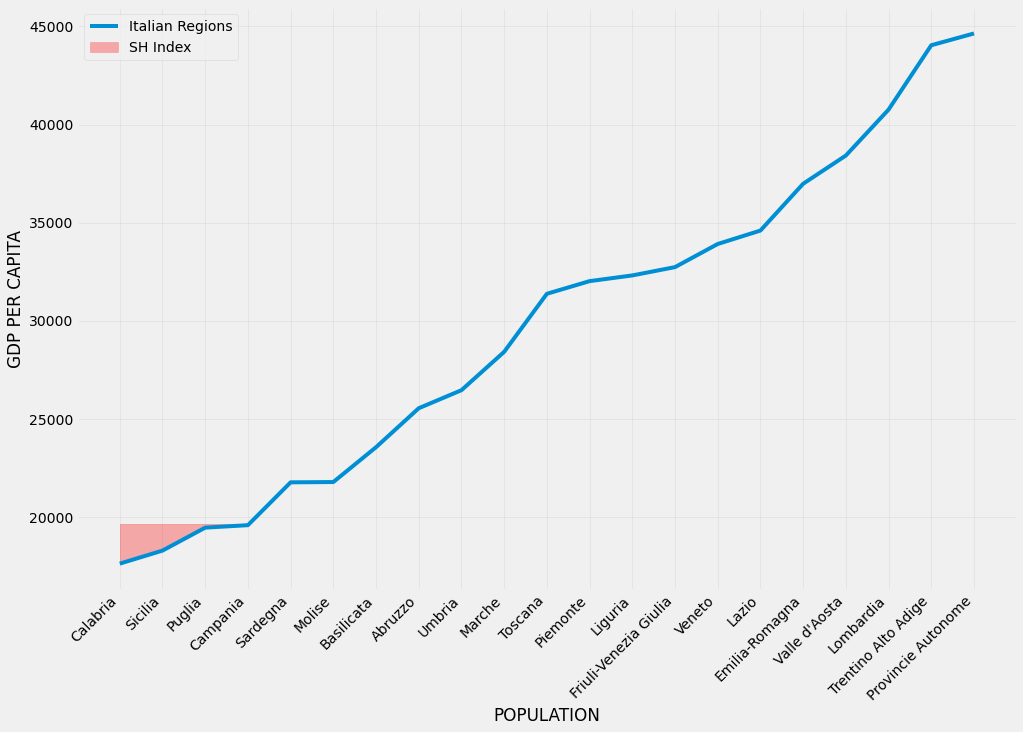

In [7]:
# SH Index

new_dataframe = pd.read_excel("Other Countries Dataset.xlsx")

sh_sum = pd.Series(new_dataframe["GDP PP"])
SH_INDEX = round(sh_sum.mean(),2)

# Plot 2

GDP_for_region_sorted = gdp_per_region.sort_values('GDP PER CAPITA')

plt.figure(figsize=(15,10))
plt.grid(alpha=0.30)
plt.xlabel('POPULATION')
plt.ylabel('GDP PER CAPITA')
plt.plot(GDP_for_region_sorted['Region'], GDP_for_region_sorted['GDP PER CAPITA'], label='Italian Regions')
plt.xticks(rotation=45, ha='right')
plt.fill_between(GDP_for_region_sorted['Region'], GDP_for_region_sorted['GDP PER CAPITA'],SH_INDEX,alpha=0.3, 
where=GDP_for_region_sorted['GDP PER CAPITA'] < SH_INDEX, color = "Red", label="SH Index")
plt.legend()

legend = plt.legend()
for text in legend.get_texts():
    text.set_color('Black')

plt.show()

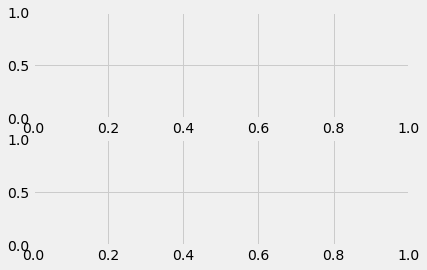

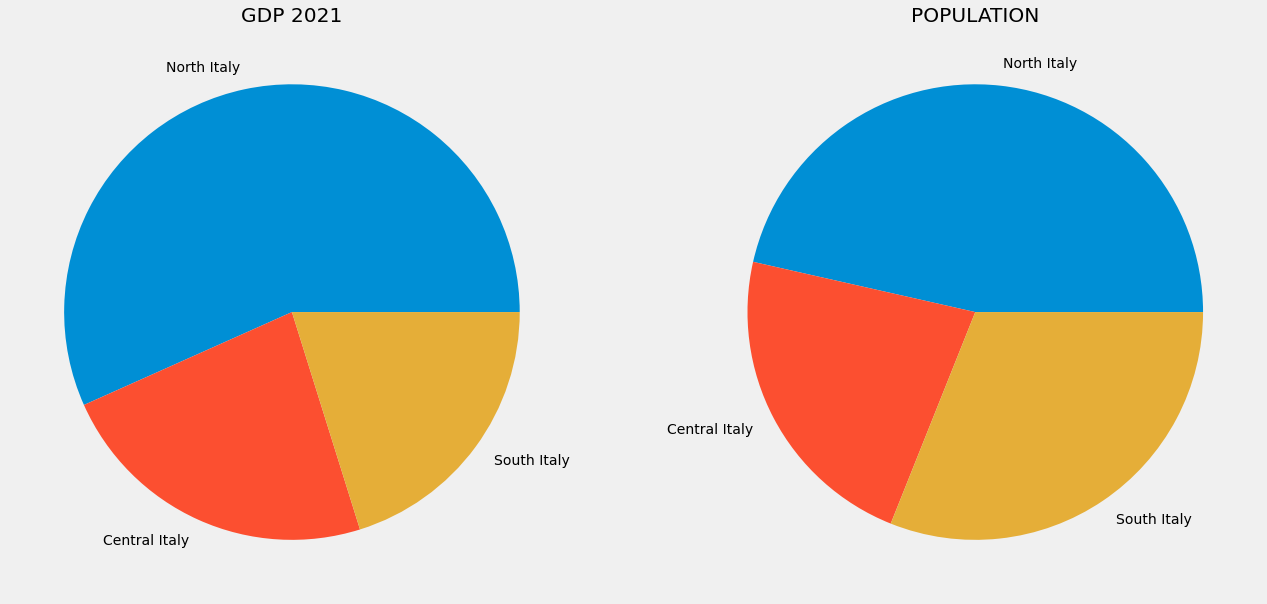

In [8]:
# Plot 3

fig, ax = plt.subplots(nrows=2, ncols=1)

datas_to_plot = [gdp_per_area[gdp_in_year], gdp_per_area['POPULATION']]

plt.figure(figsize=(20,10))

ax = plt.subplot2grid((1,2),(0,0))
plt.pie(datas_to_plot[0][1:4], labels=['North Italy', 'Central Italy', 'South Italy'])
title = str(gdp_in_year)
ax.set_title(title)

ax = plt.subplot2grid((1,2), (0, 1))
plt.pie(datas_to_plot[1][1:4], labels=['North Italy', 'Central Italy', 'South Italy'])
ax.set_title('POPULATION')

plt.show()